Check out the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

In [73]:
# Let's import what we'll need for the analysis and visualization

import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import seaborn as sns
%matplotlib inline

In [74]:
# Set up the Titanic csv file as a DataFrame

titanic_df = pd.read_csv('train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [75]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
#Fill missing "Age" with mean

titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

titanic_df.Age = titanic_df.Age.astype('int64')

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [77]:
# Fixed missing "Embarked" column

# the most common embarkation port is Southampton, so let's assume everyone got on there. 
# replace all the missing values in the Embarked column with S

titanic_df.Embarked = titanic_df.Embarked.fillna('Southhampton')

In [78]:
# Fixed missing "Cabin" column
# assume passenger who held same ticket number should seat in same cabin

# loop through rows in datafram and fill Cabin

for i, row in titanic_df.iterrows():
    if pd.isnull(row['Cabin']):
        continue
    else:
        for j, row in titanic_df.iterrows():
            if pd.isnull(titanic_df.loc[j,'Cabin']):
                if titanic_df.loc[j,'Ticket'] == titanic_df.loc[i,'Ticket']:
                    titanic_df.loc[j,'Cabin'] = titanic_df.loc[i,'Cabin']
                    break

In [79]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        215 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. 

First some basic questions:

1.) Who were the passengers on the Titanic (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that    relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

5.) What factors helped someone survive the sinking?

In [ ]:
# 1st question: Who were the passengers on the titanic?

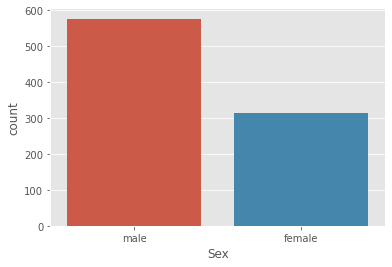

In [80]:
# Let's first check gender with count plot

sns.countplot(x='Sex', data=titanic_df);

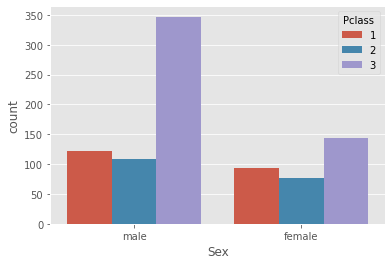

In [81]:
# Now let's seperate the genders by classes

sns.countplot(x='Sex',hue='Pclass',data=titanic_df);

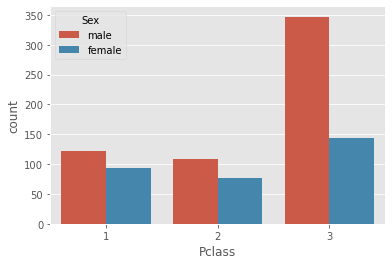

In [82]:
sns.countplot(x='Pclass',hue='Sex',data=titanic_df);

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children.

In [83]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 

def male_female_child (passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [84]:
# We'll define a new column called 'person'

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


Excellent! Now we have seperated the passengers between female,male,and child. This will be important later on beacuse of the famous "Women and children first policy"!

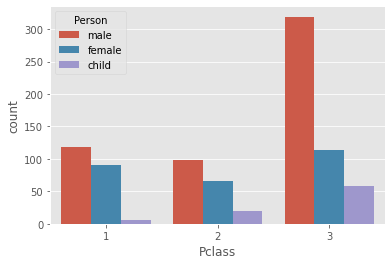

In [85]:
# Let's try plot again! seperate the classes by person

sns.countplot(x='Pclass',hue='Person',data=titanic_df);

Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

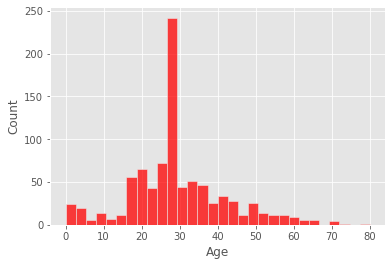

In [88]:
# create a histogram 

sns.histplot(data=titanic_df.Age, bins=30, color='red');

In [11]:
titanic_df.Age.mean()

29.69911764705882

In [89]:
# We could also get a quick overall comparison of male,female,child

titanic_df.Person.value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

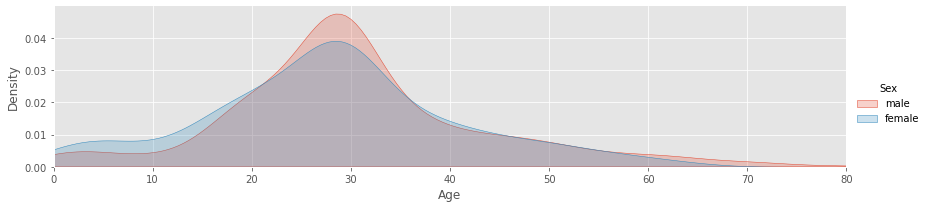

In [90]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data=titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest_age = titanic_df.Age.max()

fig.set(xlim=(0,oldest_age))
fig.add_legend()

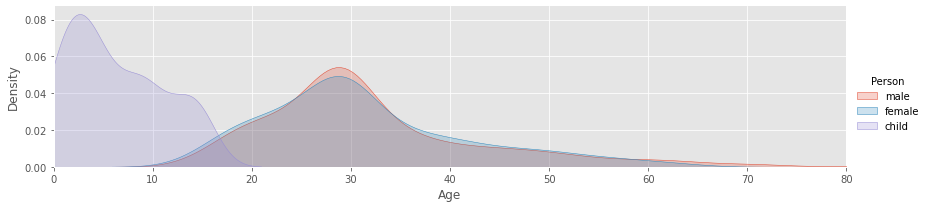

In [91]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(data=titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest_age = titanic_df.Age.max()

fig.set(xlim=(0,oldest_age))
fig.add_legend()

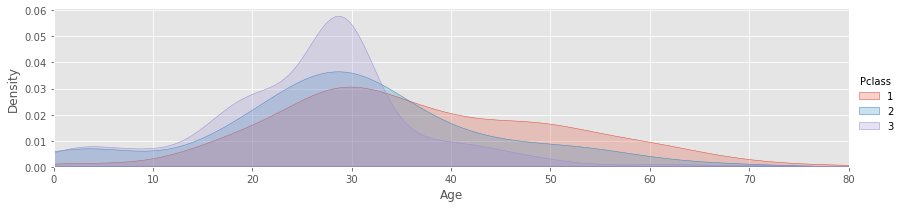

In [92]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(data=titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest_age = titanic_df.Age.max()

fig.set(xlim=(0,oldest_age))
fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class.

In [ ]:
#2nd question: What deck were the passengers on and how does that relate to their class?

In [93]:
# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [94]:
# First we'll drop the NaN values and create a new object, deck

deck = titanic_df.Cabin.dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [95]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

cabin_df.value_counts()

Cabin
C        67
B        48
D        33
E        33
A        15
F        14
G         4
T         1
dtype: int64

Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:

In [96]:
# Redefine cabin_df as everything but where the row was equal to 'T'

cabin_df = cabin_df[cabin_df.Cabin != 'T']

cabin_df.value_counts()

Cabin
C        67
B        48
D        33
E        33
A        15
F        14
G         4
dtype: int64

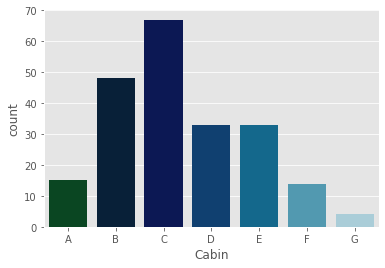

In [97]:
# Let's try plot again! 

sns.countplot(x='Cabin',data=cabin_df,palette='ocean',order=['A','B','C','D','E','F','G']);

Great now that we've analyzed the distribution by decks

In [65]:
# 3rd question: Where did the passengers come from?

In [98]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

In [99]:
titanic_df.Embarked= titanic_df.Embarked.map({'C':'Cherbourg','Q':'Queenstown','S':'Southhampton'})

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southhampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southhampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southhampton,male


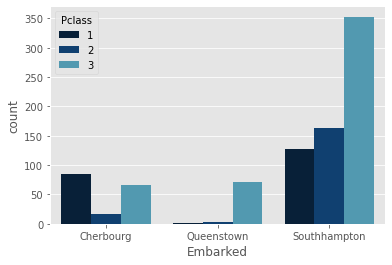

In [100]:
# Now we can make a quick plot to check out the results

sns.countplot(x='Embarked',data=titanic_df, hue='Pclass',palette='ocean',order=['Cherbourg','Queenstown','Southhampton']);

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

In [ ]:
#4th question: Who was alone and who was with family?

In [101]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column


titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp

titanic_df.Alone

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [102]:
# Look for >0 or ==0 to set alone status

titanic_df.Alone.loc[titanic_df.Alone > 0] = 'with family'

titanic_df.Alone.loc[titanic_df.Alone == 0] = 'alone'

C:\Users\Gian\AppData\Local\Temp\ipykernel_7756\1778172010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.Alone.loc[titanic_df.Alone > 0] = 'with family'


In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southhampton,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southhampton,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southhampton,male,alone


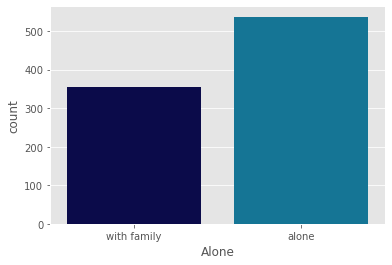

In [104]:
# Now we can make a quick plot to check out the results

sns.countplot(x='Alone',data=titanic_df, palette='ocean');

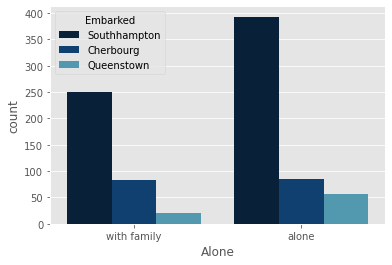

In [48]:
sns.countplot(x='Alone',data=titanic_df, hue='Embarked',palette='ocean');

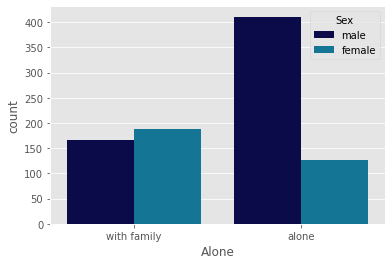

In [105]:
sns.countplot(x='Alone',data=titanic_df, hue='Sex',palette='ocean');

In [ ]:
#Last question : What factors helped someone survive the sinking?

In [106]:
# Let's start by creating a new column for legibility purposes through mapping

titanic_df['Survivor'] = titanic_df.Survived.map({0:'Died',1:'Alive'})

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southhampton,male,with family,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,with family,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female,alone,Alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southhampton,female,with family,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southhampton,male,alone,Died


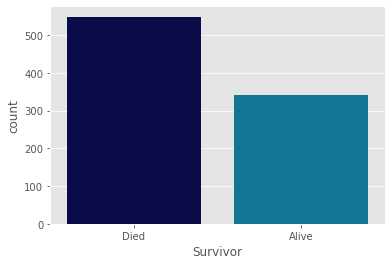

In [42]:
# Let's just get a quick overall view of survied vs died.

sns.countplot(x='Survivor',data=titanic_df, palette='ocean');

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

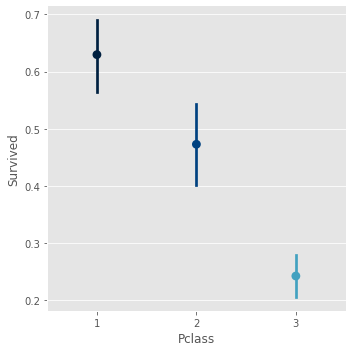

In [107]:
# Let's use a factor plot again, but now considering class

sns.catplot(x='Pclass',y='Survived',data=titanic_df,palette='ocean',kind='point');

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

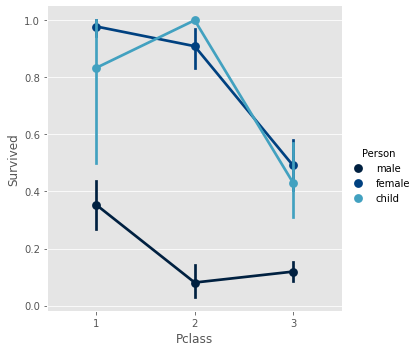

In [108]:
# Let's use a factor plot again, but now considering class and gender

sns.catplot(x='Pclass',y='Survived',data=titanic_df, hue='Person',palette='ocean',kind='point');

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

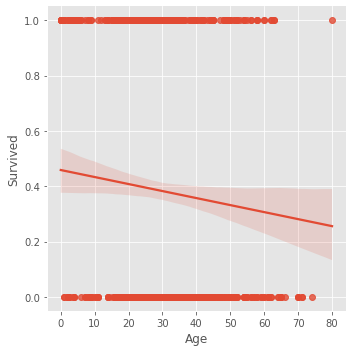

In [109]:
# Let's use a linear plot on age versus survival

sns.lmplot(x='Age',y='Survived',data=titanic_df);

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

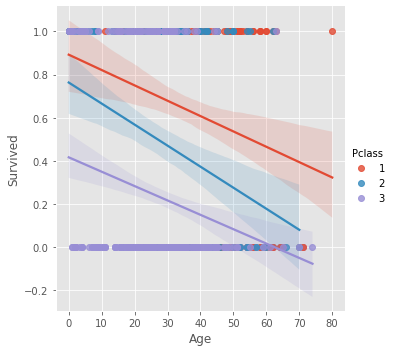

In [110]:
# Let's use a linear plot on age versus survival using hue for class seperation

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df);

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

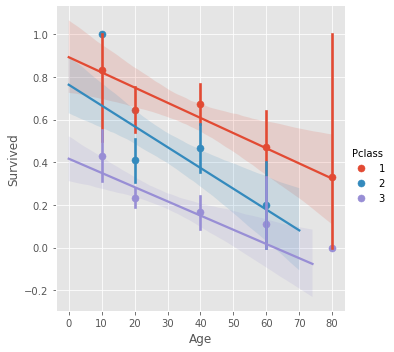

In [111]:
# Let's use a linear plot on age versus survival using hue for class seperation
Age_Generation = [10,20,40,60,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,x_bins=Age_Generation);

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

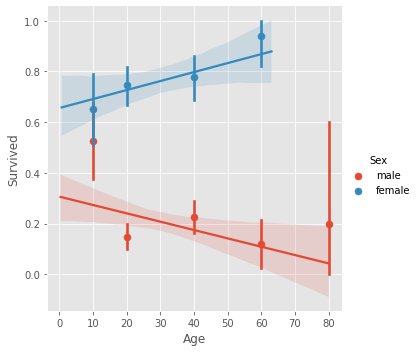

In [36]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,x_bins=Age_Generation);

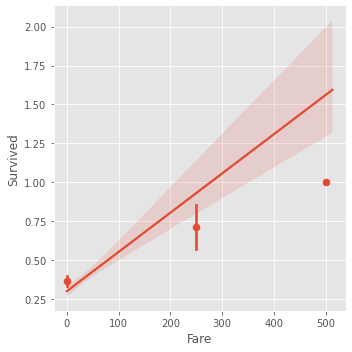

In [113]:
#Now investigate what about ticket fare relate survival rate ?

# set range of price
farerange = [0,250,500,750,1000]

# plot data of fare versus survival
sns.lmplot(x='Fare',y='Survived',data=titanic_df,palette='ocean',x_bins=farerange)

Look like higher fare will increase chance of survival rate, this maybe related with 1st class passenger have higher survived

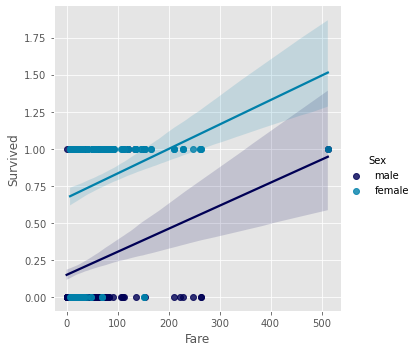

In [118]:
# check survived rate relate fare by gender 

sns.lmplot(x='Fare',y='Survived',hue='Sex',data=titanic_df,palette='ocean')

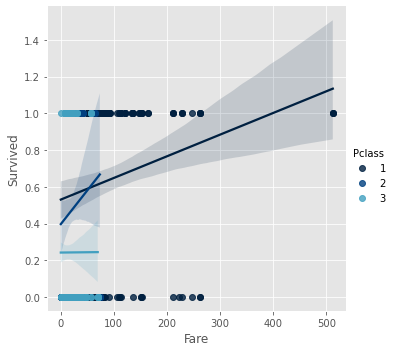

In [119]:
# check survived rate relate fare by Pclass

sns.lmplot(x='Fare',y='Survived',hue='Pclass',data=titanic_df,palette='ocean')

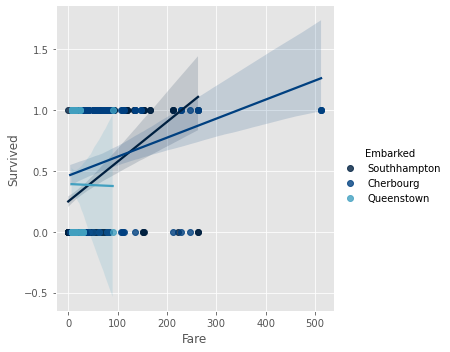

In [121]:
# check survived rate relate fare by embarked

sns.lmplot(x='Fare',y='Survived',hue='Embarked',data=titanic_df,palette='ocean')

From the result, look seek, higher fare may little bit increased survival chance

Now, how if passenger who travel with family will increase chance of survival?

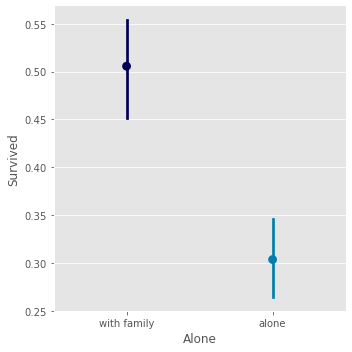

In [123]:
# how about survival rate if relate with family or alone


sns.catplot(x='Alone',y='Survived',data=titanic_df,palette='ocean',kind='point');

Wow!, interesting result, family passenger show hight survived than who alone.

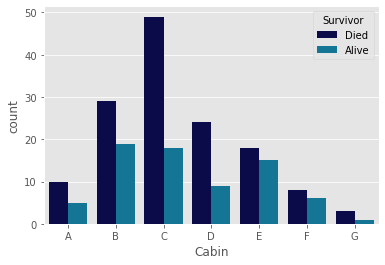

In [145]:
# Now remain the cabin position data, it relate to survived?

passenger_position = cabin_df.join(titanic_df.Survivor)

sns.countplot(x='Cabin',data=passenger_position, hue='Survivor',palette='ocean', order=['A','B','C','D','E','F','G']);

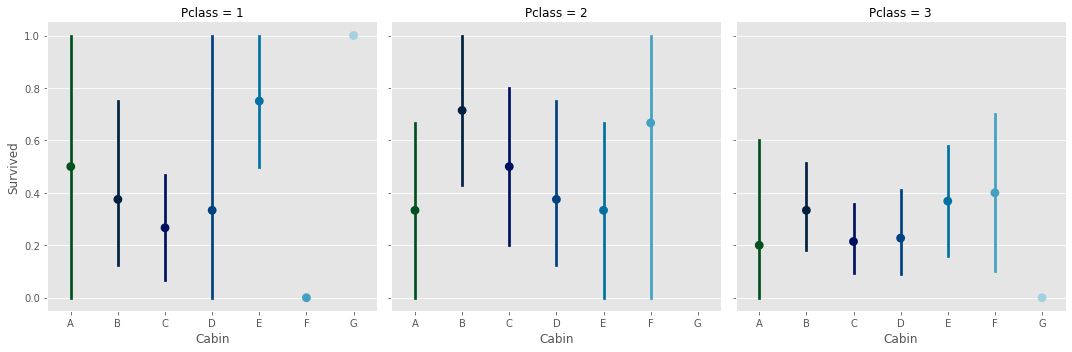

In [157]:
# how about survival rate if relate with the cabin position data and Class

passenger_class = passenger_position.join(titanic_df.Pclass)
passenger_class_survived = passenger_class.join(titanic_df.Survived)

sns.catplot(x='Cabin',y='Survived',data=passenger_class_survived,col='Pclass',palette='ocean',kind='point',order=['A','B','C','D','E','F','G']);

Awesome! we've gotten some really great insights on how gender,age, class, fare, cabin position and family passenger all related to a passengers chance of survival.